In [5]:
# POPULATION ANALYSIS - TRAINED DATA, no familiarity effect. regulation carries on

# import list
%reload_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import main_funcs as mfun
import utils_funcs as utils
import plot_funcs as pfun
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from itertools import compress
import seaborn as sns
from sklearn import preprocessing
import matplotlib.gridspec as gridspec
import matplotlib as mpl
import glob as glob
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.filterwarnings("ignore", category= FutureWarning) 
warnings.filterwarnings("ignore", category= UserWarning) 

#paths
savefigpath  = r'G:\My Drive\Manuscripts\1 CLAStPFC\panels_raw'
'G:\\My Drive\\Manuscripts\\3 CLAStPFC\\figuresForCLAStPFC\\figurePanels\\'
analysispath = 'C:\\Users\\Huriye\\Documents\\code\\clapfcstimulation\\analysis\\'


###### Training plots for lick traces
[22101, 22102, 22103, 22105, 22107, 2303, 2304]
Stat: Difference between 1 sec before reward and 1 sec before stimuli
WilcoxonResult(statistic=0.0, pvalue=0.027707849358079864)

###### Bar plots for cell ratios
None - Total animal number for 7
All - Total animal number for 7
Sensory - Total animal number for 7
Opto - Total animal number for 7
Opto-boosted - Total animal number for 7
None - Total animal number for 7
All - Total animal number for 7
Sensory - Total animal number for 7
Opto - Total animal number for 7
Opto-boosted - Total animal number for 7


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



 >>>> Percentage of cells per group:                    All         Act         Sup
Condition                                      
All           53.431034  100.000000  100.000000
None          46.568966  100.000000  100.000000
Opto          29.532305   36.984926   63.015074
Opto-boosted  12.015822   46.008394   53.991606
Sensory       21.930171   50.737649   49.262351
Sensory - Total animal number for 7
Sensory--> Exc vs Inh: p = 0.578125 Wilcoxon: 10.0
Opto - Total animal number for 7
Opto--> Exc vs Inh: p = 0.109375 Wilcoxon: 4.0
Opto-boosted - Total animal number for 7
Opto-boosted--> Exc vs Inh: p = 0.296875 Wilcoxon: 7.0

###### Magnitude of responses panels
Sensory : 2.6186065789175825e-49
Opto : 3.150675948581438e-134
Opto-boosted : 1.6121081897579185e-91

###### Plotting summary panels
$\Delta$ Absolute magnitude ---> [0.03125, 0.109375, 0.296875, 0.9375, 0.8125]
$\Delta$ CV ---> [0.21875, 0.375, 0.578125, 0.21875, 0.578125]
$\Delta$ DTW ---> [0.078125, 0.46875, 0.8125, 1.0, 

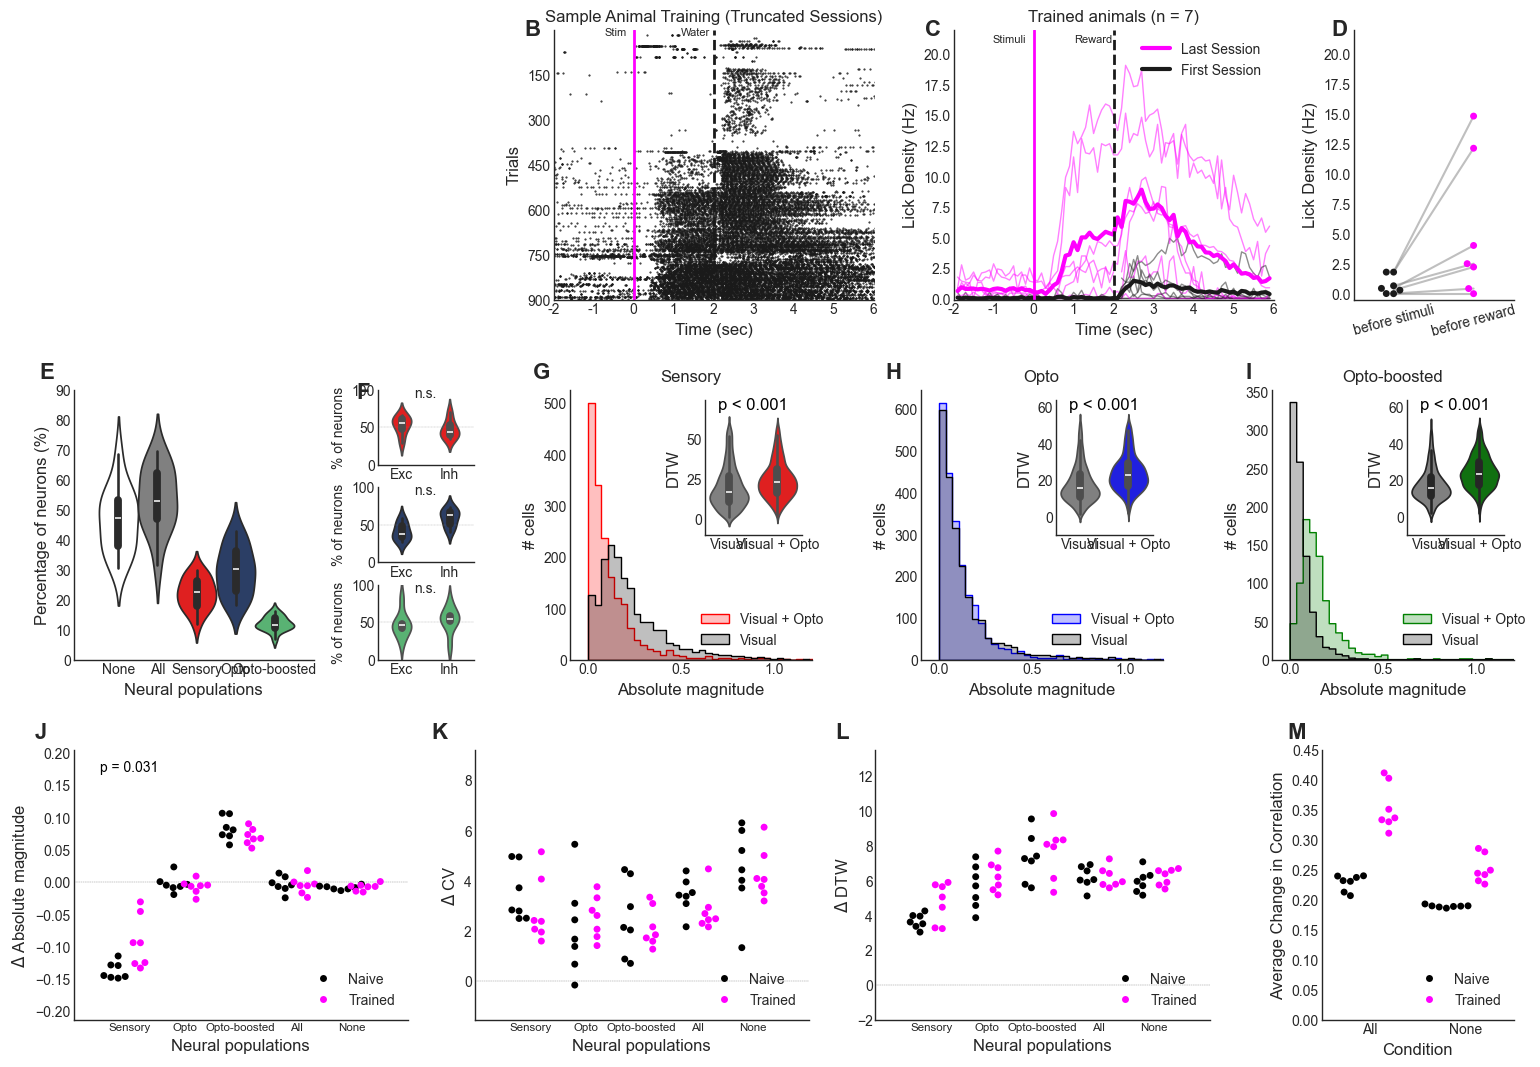

In [16]:
# Figure 4 : Chrimson mice - TRAINED population analysis
interestedCohort = 'Chrimson'
interestedTrainedLevel = 'Trained'

plotParams = {
    'ylimitsforhist': [0, 750],
    'xlimitsforhist': [-0.75, 0.75],
    'analysis_time': 1500,  # in ms
    'colorbarlimitsForHeatMap': [-1, 1],
    'scatterplotlimits': [-4.5, 4.5],
    'ylimitsforECDF': [0.6, 1.1],
    'xlimitsforABS': [-0.1, 1.2],
    'xlimitsforCV': [-3, 3],
    'faceColors': ['black','red'],
            }

pfun.set_figure()
fig = plt.figure(constrained_layout=False, figsize=(16,18)) # 8,11 for full A4 page

# set gridspecs
gs_exampleTrainingSession  = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.35,right=0.55,
                              wspace=0.1, hspace=0.2)
gs_lickAllTrace            = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.60, right=0.80,
                              wspace=0.2, hspace=0.4)
gs_lickAllTraceSumary      = fig.add_gridspec(ncols=1, nrows=1, bottom=0.80, top=0.95, left=0.85, right=0.95,
                              wspace=0.2, hspace=0.4)

gs_cellRatios               = fig.add_gridspec(ncols=1, nrows=1, bottom=0.60, top=0.75, left=0.05, right=0.20,
                              wspace=0.2, hspace=0.2)
gs_E_I_Ratios              = fig.add_gridspec(ncols=1, nrows=3, bottom=0.60, top=0.75, left=0.24, right=0.30,
                              wspace=0.2, hspace=0.3)
gs_magnitudeHist            = fig.add_gridspec(ncols=3, nrows=1, bottom=0.60, top=0.75, left=0.36, right=0.95,
                              wspace=0.45, hspace=0.2)
gs_Summary                  = fig.add_gridspec(ncols=3, nrows=1, bottom=0.40, top=0.55, left=0.05, right=0.76, 
                              wspace=0.2, hspace=0.1)
gs_correlationMean          = fig.add_gridspec(ncols=1, nrows=1, bottom=0.40, top=0.55, left=0.83, right=0.95, 
                               wspace=0.2, hspace=0.1)


# # Panel B: Example training session
total_num_axis = gs_exampleTrainingSession.get_geometry()[0]* gs_exampleTrainingSession.get_geometry()[1]
ax_gs_exampleTrainingSession = {xx: fig.add_subplot(gs_exampleTrainingSession[xx]) for xx in range(total_num_axis)}
s_animalID = 22107
postStimDur = 6
preStimDur = 2
pfun.plot_exampleTrainingBehaviour(s_animalID, [preStimDur, postStimDur], ax_gs_exampleTrainingSession[0])

# # Panel C-D: Lick traces
print('\n###### Training plots for lick traces')
total_num_axis = gs_lickAllTrace.get_geometry()[0]* gs_lickAllTrace.get_geometry()[1]
ax_gs_lickAllTrace = {xx: fig.add_subplot(gs_lickAllTrace[xx]) for xx in range(total_num_axis)}
ax_gs_lickAllTraceSummary = {xx: fig.add_subplot(gs_lickAllTraceSumary[xx]) for xx in range(total_num_axis)}
trainingLevel = pfun.plot_lickDensityTraces(interestedCohort, [preStimDur, postStimDur], ax_gs_lickAllTrace,ax_gs_lickAllTraceSummary)

# Panel E: Cell ratios
print('\n###### Bar plots for cell ratios')
total_num_axis = gs_cellRatios.get_geometry()[0]* gs_cellRatios.get_geometry()[1]
ax_gs_cellRatios = {xx: fig.add_subplot(gs_cellRatios[xx]) for xx in range(total_num_axis)}
pfun.plot_cellRatiosPerAnimal('All', [interestedCohort], ['Naive', 'Trained'], ax=ax_gs_cellRatios[0], 
                              savefigname=None, savefigpath=None)
ax_gs_cellRatios[0].set_xlim([-1.15, 5])

interestedTrainedLevel = 'Trained'
#  Barplot for cell ratios
total_num_axis = gs_E_I_Ratios.get_geometry()[0]* gs_E_I_Ratios.get_geometry()[1]
ax_gs_E_I_RatiosTr = {xx: fig.add_subplot(gs_E_I_Ratios[xx]) for xx in range(3)}
pfun.plot_cellRatiosPerAnimal('Sensory', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[0],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[1],
                              savefigname=None, savefigpath=None,ComparePlot = False)
pfun.plot_cellRatiosPerAnimal('Opto-boosted', [interestedCohort], [interestedTrainedLevel], ax=ax_gs_E_I_RatiosTr[2],
                              savefigname=None, savefigpath=None,ComparePlot = False)

# Panel F-H: Magnitude of responses
print('\n###### Magnitude of responses panels')
total_num_axis = gs_magnitudeHist.get_geometry()[0]* gs_magnitudeHist.get_geometry()[1]
ax_gs_magnitudeHist = {xx: fig.add_subplot(gs_magnitudeHist[xx]) for xx in range(total_num_axis)}
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Sensory',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[0])
plotParams['faceColors'] = ['black', 'blue']
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[1])
plotParams['faceColors'] = ['black', 'green']
plotParams['ylimitsforECDF'] = [0.4, 1.1]
pfun.plot_magnitude('Visual', 'Visual + Opto', cohort=interestedCohort,
                    trainedLevel= interestedTrainedLevel, condition='Opto-boosted',
                    plotParams = plotParams,axisAll=ax_gs_magnitudeHist[2])

# Summary
print('\n###### Plotting summary panels')
total_num_axis = gs_Summary.get_geometry()[0]* gs_Summary.get_geometry()[1]
ax_gs_Summary = {xx: fig.add_subplot(gs_Summary[xx]) for xx in range(total_num_axis)}
pfun.plot_paramsDiffPerAnimal('ABS', [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[0], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('CV',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[1], savefigname=None, savefigpath=None, ComparePlot= True)
pfun.plot_paramsDiffPerAnimal('DTW',  [interestedCohort], ['Naive', 'Trained'], ax= ax_gs_Summary[2], savefigname=None, savefigpath=None, ComparePlot= True)

print('\n###### Plotting cross correlation panels')
total_num_axis = gs_correlationMean.get_geometry()[0]* gs_correlationMean.get_geometry()[1]
ax_gs_correlationMean = {xx: fig.add_subplot(gs_correlationMean[xx]) for xx in range(total_num_axis)}
corrDiff = pfun.plot_correlationMatrix_meanChange(['Naive', 'Trained'], cohorts=[interestedCohort], 
                        responsiveness=['All', 'None'], params = 'All',
                       axs=ax_gs_correlationMean[0], savefigname=None, savefigpath=None)

# Lets add the labels
axes = [ax_gs_exampleTrainingSession, ax_gs_lickAllTrace, ax_gs_lickAllTraceSummary, ax_gs_cellRatios,ax_gs_E_I_RatiosTr,
         ax_gs_magnitudeHist, ax_gs_Summary,ax_gs_correlationMean]
labels = ['B','C','D','E','F','','','G','H','I','J','K','L','M','N','O','P',
            'Q','R','S','T','U','V','W','X','Y','Z']
lInd = 0
for ax, label in zip(axes, labels):
    for key in ax:
        if lInd<3:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        elif lInd>2:
            ax[key].text(-0.08, 1.1, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        else:
            ax[key].text(-0.04, 1.04, labels[lInd], transform=ax[key].transAxes, fontsize=16, 
                        fontweight='bold', va='top', ha='right',
                        bbox=dict(facecolor='none', edgecolor='none', boxstyle='round,pad=0.1'))
        lInd += 1

savefigname = 'Figure4_Chrimson_TrainedPopulationAnalysis'
pfun.save_figure(savefigname,savefigpath)
#plt.close()
print('\n###### End of the training Chrimson data analysis!')